In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [33]:
def myFun(y,t):
  q = -torch.sin(10*y)**2 - (torch.sin(t))**2
  return q

# Check the function is running
y = torch.tensor([0.2])
t = torch.tensor([0.3])
w = myFun(y,t)
print(w)

tensor([-0.9142])


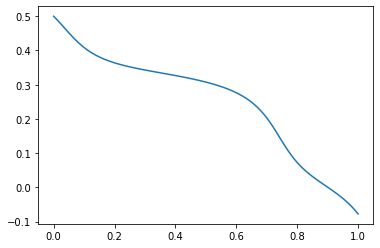

In [34]:
# Forward Euler code
def Euler(fun, y0, h=0.01, n=100):

  t = 0
  # alocate space for the solution and time steps
  y = torch.zeros(n+1)
  t = torch.arange(n+1)*h
  y[0] = y0
  # Time step
  for i in range(n):
    y[i+1] = y[i] + h*fun(y[i], t[i])
  return t, y

# Test it
y0 = 0.5
t, y = Euler(myFun, y0)
plt.plot(t, y)
  

Text(0.5, 1.0, 'The error')

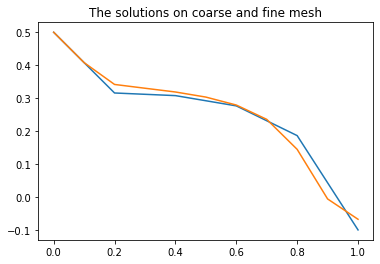

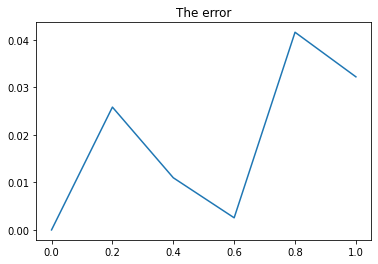

In [37]:
# Compare for problems with no analytic solutions
# Start with n=5

# Solve on coarse grid
tC, yC = Euler(myFun, y0, h=0.2, n=5)

# Solve on fine grid
tF, yF = Euler(myFun, y0, h=0.2/2, n=2*5)
plt.figure(1)
plt.plot(tC, yC, tF, yF)
plt.title('The solutions on coarse and fine mesh')

# plot the error
r = torch.abs(yC - yF[0::2])
plt.figure(2)
plt.plot(tC, r)
plt.title('The error')


Class Assignment

How to choose $h$ such that the maximum of $r$ is smaller than $10^{-3}$